In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import smogn
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error
from sklearn.cluster import KMeans
import shap

In [17]:
above_51 = pd.read_csv("dataset/group_51_and_above.csv", low_memory=False)
dataset = above_51
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Columns: 102 entries, nomem_encr to work_impact_of_health
dtypes: float64(56), int64(46)
memory usage: 2.3 MB


In [18]:
# Checking missing values
dataset.replace(' ', np.nan, inplace=True)
print('Overall missing values: ', dataset.isnull().sum().sum())

Overall missing values:  0


In [19]:
# Checking datatypes
print(dataset.dtypes.to_string())

nomem_encr                              int64
swls_score                            float64
extraversion                          float64
agreeableness                         float64
conscientiousness                     float64
emotional_stability                   float64
intellect_imagination                 float64
leisure_time_satisfaction             float64
theatre                                 int64
cabaret                                 int64
dance_performance                       int64
classical_concert                       int64
opera                                   int64
musical                                 int64
pop_festival                            int64
house_party                             int64
museum                                  int64
art_gallery                             int64
library                                 int64
cinema                                  int64
film_event                              int64
food_event                        

## Feature Encoding

**Data type transformation**

In [5]:
# Converting to Categorical
dataset.gender = pd.Categorical(dataset.gender)
dataset.civil_status = pd.Categorical(dataset.civil_status)
dataset.domestic_situation = pd.Categorical(dataset.domestic_situation)

dataset.urbanization = pd.Categorical(dataset.urbanization)
dataset.occupation = pd.Categorical(dataset.occupation)
dataset.highest_education = pd.Categorical(dataset.highest_education, ordered=True)
dataset.origin = pd.Categorical(dataset.origin)

dataset.self_assessed_health = pd.Categorical(dataset.self_assessed_health, ordered=True)
dataset.long_standing_disease = pd.Categorical(dataset.long_standing_disease)
dataset.daily_impact_of_health = pd.Categorical(dataset.daily_impact_of_health, ordered=True)
dataset.social_impact_of_health = pd.Categorical(dataset.social_impact_of_health, ordered=True)
dataset.work_impact_of_health = pd.Categorical(dataset.work_impact_of_health, ordered=True)

print(dataset[['gender','civil_status','domestic_situation',
               'urbanization','occupation', 'highest_education', 'origin', 
               'self_assessed_health', 'long_standing_disease', 
               'daily_impact_of_health', 'social_impact_of_health', 'work_impact_of_health',
              ]].dtypes)

gender                     category
civil_status               category
domestic_situation         category
urbanization               category
occupation                 category
highest_education          category
origin                     category
self_assessed_health       category
long_standing_disease      category
daily_impact_of_health     category
social_impact_of_health    category
work_impact_of_health      category
dtype: object


In [6]:
dataset.head()

,nomem_encr,swls_score,extraversion,agreeableness,conscientiousness,emotional_stability,intellect_imagination,leisure_time_satisfaction,theatre,cabaret,...,urbanization,occupation,net_monthly_income,highest_education,origin,self_assessed_health,long_standing_disease,daily_impact_of_health,social_impact_of_health,work_impact_of_health
0,800009,23.0,1.0,13.0,18.0,-11.0,25.0,10.0,0,0,...,5,9,7.0,5,0,3,1,1,1,1
1,800015,22.0,-11.0,18.0,23.0,-12.0,15.0,5.0,0,0,...,1,1,7.0,6,102,3,1,1,1,1
2,800028,29.0,2.0,14.0,13.0,-6.0,19.0,9.0,3,3,...,2,9,6.0,3,0,3,2,2,1,1
3,800119,20.0,-2.0,6.0,9.0,-20.0,12.0,10.0,0,0,...,2,9,1.0,2,101,3,2,2,1,2
4,800131,32.0,0.0,18.0,16.0,-17.0,17.0,10.0,0,0,...,5,9,14.0,4,0,3,1,3,2,3


In [7]:
# to ordered categorical
dataset.theatre = pd.Categorical(dataset.theatre, ordered=True)
dataset.cabaret = pd.Categorical(dataset.cabaret, ordered=True)
dataset.dance_performance = pd.Categorical(dataset.dance_performance, ordered=True)
dataset.classical_concert = pd.Categorical(dataset.classical_concert, ordered=True)
dataset.opera = pd.Categorical(dataset.opera, ordered=True)
dataset.musical = pd.Categorical(dataset.musical, ordered=True)
dataset.pop_festival = pd.Categorical(dataset.pop_festival, ordered=True)
dataset.house_party = pd.Categorical(dataset.house_party, ordered=True)
dataset.museum = pd.Categorical(dataset.museum, ordered=True)
dataset.art_gallery = pd.Categorical(dataset.art_gallery, ordered=True)
dataset.library = pd.Categorical(dataset.library, ordered=True)
dataset.cinema = pd.Categorical(dataset.cinema, ordered=True)
dataset.film_event = pd.Categorical(dataset.film_event, ordered=True)
dataset.food_event = pd.Categorical(dataset.food_event, ordered=True)
dataset.fair = pd.Categorical(dataset.fair, ordered=True)
dataset.flea_market = pd.Categorical(dataset.flea_market, ordered=True)
dataset.zoo = pd.Categorical(dataset.zoo, ordered=True)
dataset.theme_park = pd.Categorical(dataset.theme_park, ordered=True)
dataset.holiday_within_the_Netherlands = pd.Categorical(dataset.holiday_within_the_Netherlands, ordered=True)
dataset.holiday_abroad = pd.Categorical(dataset.holiday_abroad, ordered=True)

# to ordered categorical
dataset.emptiness = pd.Categorical(dataset.emptiness, ordered=True)
dataset.people_to_count_on_when_misfortune = pd.Categorical(dataset.people_to_count_on_when_misfortune, ordered=True)
dataset.people_to_fully_rely_on = pd.Categorical(dataset.people_to_fully_rely_on, ordered=True)
dataset.closely_connected_people = pd.Categorical(dataset.closely_connected_people, ordered=True)
dataset.miss_having_people_around = pd.Categorical(dataset.miss_having_people_around, ordered=True)
dataset.feel_deserted = pd.Categorical(dataset.feel_deserted, ordered=True)

dataset.family_day = pd.Categorical(dataset.family_day, ordered=True)
dataset.neighborhood_day = pd.Categorical(dataset.neighborhood_day, ordered=True)
dataset.others_day = pd.Categorical(dataset.others_day, ordered=True)
dataset.family_evening = pd.Categorical(dataset.family_evening, ordered=True)
dataset.neighborhood_evening = pd.Categorical(dataset.neighborhood_evening, ordered=True)
dataset.others_evening = pd.Categorical(dataset.others_evening, ordered=True)

**Data Encoding**

In [ ]:
# Using Dummy Encoding to handle binary columns
binary_cols = ['long_standing_disease']
dataset = pd.get_dummies(dataset, columns=binary_cols, drop_first=True)

In [ ]:
categorical_cols = ['gender', 'civil_status', 'domestic_situation', 
                    'urbanization', 'occupation', 'origin']
dataset = pd.get_dummies(dataset, columns=categorical_cols)

In [11]:
# Using Label Encoding to handle ordered categories
label_encoder = LabelEncoder()
ordered_cols = ['highest_education', 
                'self_assessed_health', 
                'daily_impact_of_health', 'social_impact_of_health', 'work_impact_of_health',
                
                'theatre', 'cabaret', 'dance_performance', 'classical_concert', 'opera', 
                'musical', 'pop_festival', 'house_party', 'museum', 'art_gallery', 
                'library', 'cinema', 'film_event', 'food_event', 'fair', 
                'flea_market', 'zoo', 'theme_park', 'holiday_within_the_Netherlands', 'holiday_abroad',
               
                'emptiness', 'people_to_count_on_when_misfortune', 'people_to_fully_rely_on', 
                'closely_connected_people', 'miss_having_people_around', 'feel_deserted',
                'family_day', 'neighborhood_day', 'others_day', 
                'family_evening', 'neighborhood_evening', 'others_evening'
               ]
for col in ordered_cols:
    dataset[col] = label_encoder.fit_transform(dataset[col])

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2972 entries, 0 to 2971
Columns: 130 entries, nomem_encr to origin_202
dtypes: float64(91), int64(39)
memory usage: 2.9 MB


In [13]:
# Checking that the shapes all make sense
print(dataset.drop(columns=["swls_score"]).shape, dataset["swls_score"].shape)
print(dataset.shape)

(2972, 129) (2972,)
(2972, 130)


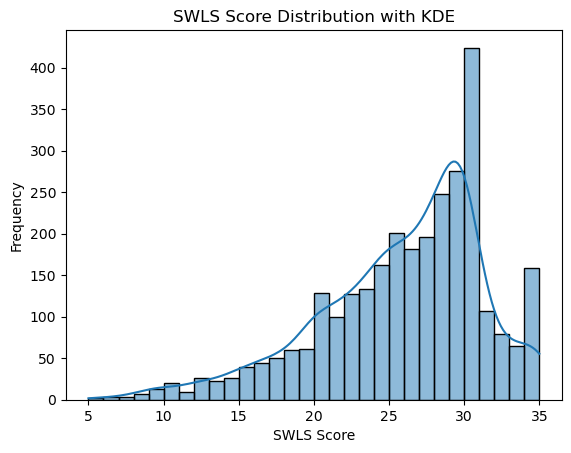

In [14]:
sns.histplot(dataset.swls_score, kde=True, bins=30)
plt.xlabel('SWLS Score')
plt.ylabel('Frequency')
plt.title('SWLS Score Distribution with KDE')
plt.show()

## Feature Selection

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.linear_model import LassoCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# data splitting
X = dataset.drop(columns=['swls_score', 'nomem_encr'])
y = dataset['swls_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RFECV with Gradient Boosting:
print("Using RFECV to determine the optimal number of features for Gradient Boosting...")
gb_model = GradientBoostingRegressor(random_state=42)
rfecv = RFECV(estimator=gb_model, step=10, cv=5, scoring='r2')
rfecv.fit(X_train, y_train)

optimal_features = rfecv.n_features_
print(f"Optimal number of features determined by RFECV: {optimal_features}")

methods = {
    "F-Test": lambda X, y: SelectKBest(score_func=f_regression, k=20).fit(X, y).get_support(),
    "Lasso": lambda X, y: LassoCV(cv=5, random_state=42).fit(X, y).coef_ != 0,
    "Random Forest": lambda X, y: RandomForestRegressor(random_state=42).fit(X, y).feature_importances_ > np.mean(RandomForestRegressor(random_state=42).fit(X, y).feature_importances_),
    "Gradient Boosting": lambda X, y: GradientBoostingRegressor(random_state=42).fit(X, y).feature_importances_ > np.mean(GradientBoostingRegressor(random_state=42).fit(X, y).feature_importances_),
    "RFE (Linear Regression)": lambda X, y: RFE(estimator=LinearRegression(), 
                                                n_features_to_select=optimal_features, step=10).fit(X, y).support_,
    "RFE (Lasso Regression)": lambda X, y: RFE(estimator=LassoCV(cv=5, random_state=42), 
                                               n_features_to_select=optimal_features, step=10).fit(X, y).support_,
    "RFE (Random Forest)": lambda X, y: RFE(estimator=RandomForestRegressor(random_state=42), 
                                            n_features_to_select=optimal_features, step=10).fit(X, y).support_,
    "RFE (Gradient Boosting)": lambda X, y: RFE(estimator=GradientBoostingRegressor(random_state=42), 
                                                n_features_to_select=optimal_features, step=10).fit(X, y).support_,
}

results = []
for method_name, method_func in methods.items():
    selected = method_func(X_train, y_train)
    selected_features = X_train.columns[selected]

    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train[selected_features], y_train)
    y_test_pred = model.predict(X_test[selected_features])
    
    r2 = r2_score(y_test, y_test_pred)
    mae = mean_absolute_error(y_test, y_test_pred)
    results.append((method_name, r2, mae))
    print(f"{method_name} - Validation R²: {r2:.3f}, MAE: {mae:.3f}")

results_df = pd.DataFrame(results, columns=["Method", "Validation R²", "Validation MAE"])
print("\nFeature Selection Methods Performance:")
print(results_df)


Using RFECV to determine the optimal number of features for Gradient Boosting...
Optimal number of features determined by RFECV: 28
F-Test - Validation R²: 0.409, MAE: 3.271
Lasso - Validation R²: 0.404, MAE: 3.315
Random Forest - Validation R²: 0.391, MAE: 3.333
Gradient Boosting - Validation R²: 0.394, MAE: 3.326
RFE (Linear Regression) - Validation R²: 0.099, MAE: 4.144
RFE (Lasso Regression) - Validation R²: 0.405, MAE: 3.288
RFE (Random Forest) - Validation R²: 0.389, MAE: 3.344
RFE (Gradient Boosting) - Validation R²: 0.416, MAE: 3.282

Feature Selection Methods Performance:
                    Method  Validation R²  Validation MAE
0                   F-Test       0.409358        3.271393
1                    Lasso       0.404353        3.315112
2            Random Forest       0.390992        3.333246
3        Gradient Boosting       0.393885        3.325645
4  RFE (Linear Regression)       0.099049        4.143652
5   RFE (Lasso Regression)       0.405020        3.288303
6     

## Get Selected features

In [22]:
# **Selected features from previous step**
selected_features = ['extraversion', 'agreeableness', 'conscientiousness',
       'emotional_stability', 'intellect_imagination',
       'leisure_time_satisfaction', 'cabaret', 'opera', 'musical',
       'house_party', 'museum', 'art_gallery', 'cinema', 'food_event',
       'theme_park', 'holiday_within_the_Netherlands', 'holiday_abroad',
       'sports_hours', 'tv_time', 'podcast_time', 'audiobooks', 'books',
       'handicrafts', 'handwork', 'watching_at_home', 'equestrian_sport',
       'dining_out', 'music_radio', 'fishing', 'email',
       'searching_information', 'comparing_products', 'purchasing',
       'watching_online', 'downloading', 'gaming', 'reading_online',
       'other_online_activities', 'social_media_hours', 'chatting_hours',
       'forum_hours', 'social_contacts_satisfaction', 'emptiness',
       'people_to_fully_rely_on', 'closely_connected_people',
       'miss_having_people_around', 'feel_deserted', 'family_day',
       'neighborhood_day', 'others_day', 'family_evening', 'others_evening',
       'age', 'net_monthly_income', 'highest_education',
       'self_assessed_health', 'daily_impact_of_health',
       'social_impact_of_health', 'work_impact_of_health',
       'long_standing_disease_2', 'gender_1', 'civil_status_1',
       'civil_status_2', 'civil_status_3', 'domestic_situation_1',
       'domestic_situation_2', 'domestic_situation_3', 'urbanization_1',
       'occupation_4', 'occupation_10', 'occupation_12']
print(selected_features)

# **Filter the dataset to the selected features**
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


['extraversion', 'agreeableness', 'conscientiousness', 'emotional_stability', 'intellect_imagination', 'leisure_time_satisfaction', 'cabaret', 'opera', 'musical', 'house_party', 'museum', 'art_gallery', 'cinema', 'food_event', 'theme_park', 'holiday_within_the_Netherlands', 'holiday_abroad', 'sports_hours', 'tv_time', 'podcast_time', 'audiobooks', 'books', 'handicrafts', 'handwork', 'watching_at_home', 'equestrian_sport', 'dining_out', 'music_radio', 'fishing', 'email', 'searching_information', 'comparing_products', 'purchasing', 'watching_online', 'downloading', 'gaming', 'reading_online', 'other_online_activities', 'social_media_hours', 'chatting_hours', 'forum_hours', 'social_contacts_satisfaction', 'emptiness', 'people_to_fully_rely_on', 'closely_connected_people', 'miss_having_people_around', 'feel_deserted', 'family_day', 'neighborhood_day', 'others_day', 'family_evening', 'others_evening', 'age', 'net_monthly_income', 'highest_education', 'self_assessed_health', 'daily_impact_of

## Gradient Boosting with Hyperparameter Tuning and Feature Selection

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedKFold
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error
import numpy as np

estimator = GradientBoostingRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Hyperparameter tuning with GridSearchCV
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
grid_search = GridSearchCV(estimator, param_grid, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
grid_search.fit(X_train_selected, y_train)

# output best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [24]:
# Retrain the model using the best parameters
best_estimator = GradientBoostingRegressor(**best_params, random_state=42)
best_estimator.fit(X_train_selected, y_train)

# Training set evaluation
train_r2 = r2_score(y_train, best_estimator.predict(X_train_selected))
train_mae = mean_absolute_error(y_train, best_estimator.predict(X_train_selected))
train_rmse = root_mean_squared_error(y_train, best_estimator.predict(X_train_selected))

# Test set evaluation
test_r2 = r2_score(y_test, best_estimator.predict(X_test_selected))
test_mae = mean_absolute_error(y_test, best_estimator.predict(X_test_selected))
test_rmse = root_mean_squared_error(y_test, best_estimator.predict(X_test_selected))

# Print results
print("\nGridSearchCV results:")
print(f"Best mean cross-validation R² score: {grid_search.best_score_}")

print("\nTraining R² Score:", train_r2)
print("Training MAE Score:", train_mae)
print("Training RMSE Score:", train_rmse)

print("\nTest R² Score:", test_r2)
print("Test MAE Score:", test_mae)
print("Test RMSE Score:", test_rmse)



GridSearchCV results:
Best mean cross-validation R² score: 0.40188727457331064

Training R² Score: 0.5449561731803004
Training MAE Score: 2.8679512888007825
Training RMSE Score: 3.717716477477053

Test R² Score: 0.411353809121085
Test MAE Score: 3.279905489731621
Test RMSE Score: 4.3090955349350555


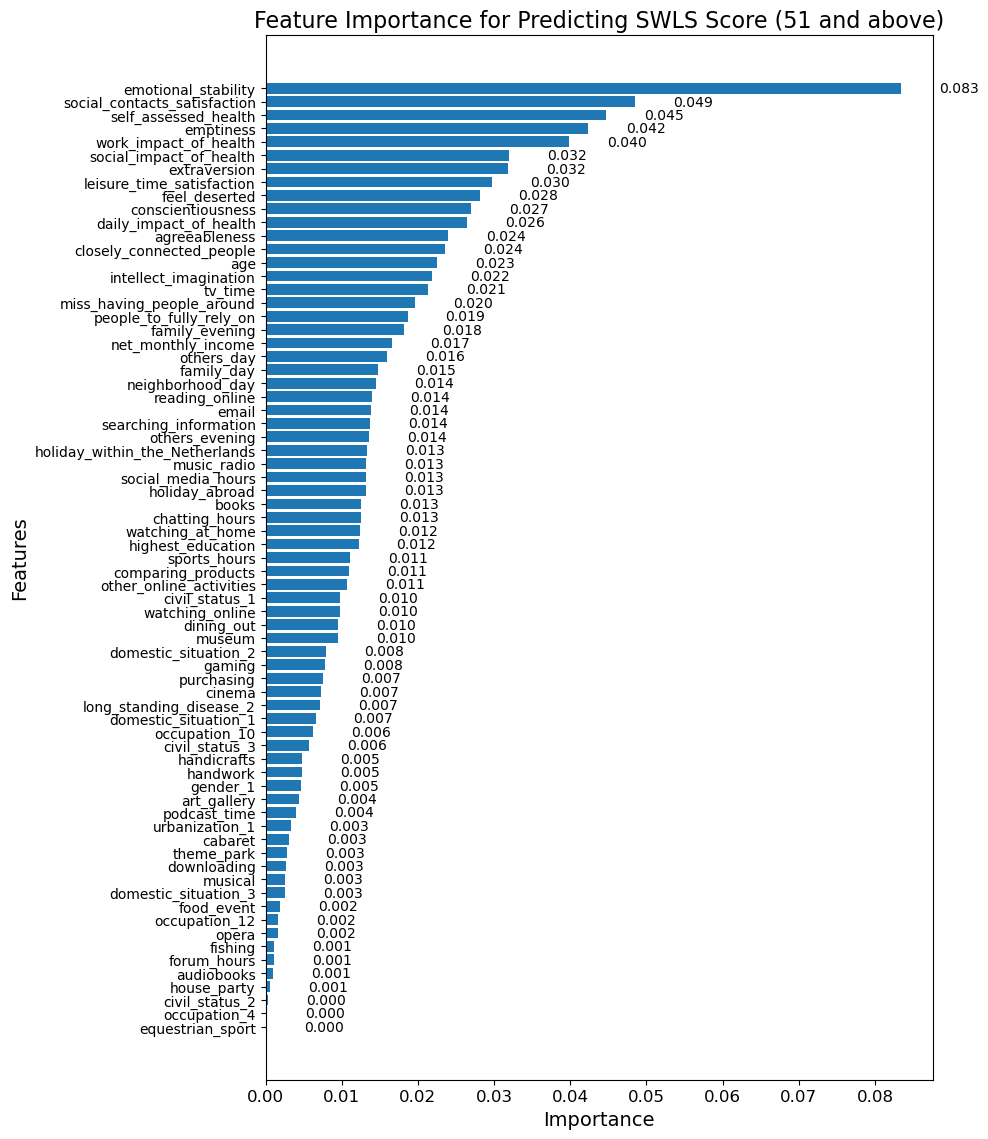

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

# Retrieve feature importance after training the best estimator
feature_importance = best_estimator.feature_importances_

# Assuming you have a list of feature names corresponding to X_train_selected
feature_names = X_train_selected.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 11.5))  # Adjust size for vertical space
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], align='center')
plt.gca().invert_yaxis()  # Place the most important feature at the top
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Feature Importance for Predicting SWLS Score (51 and above)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)  # Adjust label font size

# Add numerical labels for each bar
for bar, score in zip(bars, importance_df['Importance']):
    plt.text(bar.get_width() + 0.005, bar.get_y() + bar.get_height()/2,
             f'{score:.3f}', va='center', fontsize=10)

plt.tight_layout()  # Automatically adjust layout to prevent overlap
plt.show()


## Random Forest with Hyperparameter Tuning:

In [25]:
from sklearn.model_selection import GridSearchCV, RepeatedKFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

estimator = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None] 
}

# Hyperparameter tuning with GridSearchCV
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
grid_search = GridSearchCV(estimator, param_grid, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
grid_search.fit(X_train_selected, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_estimator = RandomForestRegressor(**best_params, random_state=42)
best_estimator.fit(X_train_selected, y_train)

# Training set evaluation
train_r2 = r2_score(y_train, best_estimator.predict(X_train_selected))
train_mae = mean_absolute_error(y_train, best_estimator.predict(X_train_selected))
train_rmse = root_mean_squared_error(y_train, best_estimator.predict(X_train_selected))

# Test set evaluation
test_r2 = r2_score(y_test, best_estimator.predict(X_test_selected))
test_mae = mean_absolute_error(y_test, best_estimator.predict(X_test_selected))
test_rmse = root_mean_squared_error(y_test, best_estimator.predict(X_test_selected))

cv_results = grid_search.cv_results_
print("\nGridSearchCV results:")
print(f"Best mean cross-validation R² score: {grid_search.best_score_}")

print("\nTraining R² Score:", train_r2)
print("Training MAE Score:", train_mae)
print("Training RMSE Score:", train_rmse)

print("\nTest R² Score:", test_r2)
print("Test MAE Score:", test_mae)
print("Test RMSE Score:", test_rmse)


Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}

GridSearchCV results:
Best mean cross-validation R² score: 0.3776580695554723

Training R² Score: 0.8415888827655365
Training MAE Score: 1.634135561972407
Training RMSE Score: 2.1935244582756

Test R² Score: 0.3900048651864304
Test MAE Score: 3.3621867684086495
Test RMSE Score: 4.386540457991315


## LASSO Regression with Hyperparameter Tuning

In [26]:
from sklearn.model_selection import train_test_split, RepeatedKFold, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Define Lasso regression model
lasso = Lasso(random_state=42)

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100] 
}

# Hyperparameter tuning with GridSearchCV
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)
grid_search = GridSearchCV(lasso, param_grid, scoring='r2', cv=cv, n_jobs=-1)
grid_search.fit(X_train_selected, y_train)

# Output the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha)

# Reinitialize the Lasso model using the best alpha value
best_lasso = Lasso(alpha=best_alpha, random_state=42)

# Evaluate the best model using cross validation
r2_scores = cross_val_score(best_lasso, X_train_selected, y_train, cv=cv, scoring='r2')
mae_scores = cross_val_score(best_lasso, X_train_selected, y_train, cv=cv, scoring='neg_mean_absolute_error')
rmse_scores = cross_val_score(best_lasso, X_train_selected, y_train, cv=cv, scoring='neg_root_mean_squared_error')

print("Cross-validation R² scores:", r2_scores)
print("Mean cross-validation R² score:", np.mean(r2_scores))

print("Cross-validation MAE scores:", -mae_scores)  
print("Mean cross-validation MAE score:", -np.mean(mae_scores))

print("Cross-validation RMSE scores:", -rmse_scores) 
print("Mean cross-validation RMSE score:", -np.mean(rmse_scores))

# Train and evaluate on the training set and test set
best_lasso.fit(X_train_selected, y_train)

# Training set evaluation
train_r2 = r2_score(y_train, best_lasso.predict(X_train_selected))
train_mae = mean_absolute_error(y_train, best_lasso.predict(X_train_selected))
train_rmse = root_mean_squared_error(y_train, best_lasso.predict(X_train_selected))

# Test set evaluation
test_r2 = r2_score(y_test, best_lasso.predict(X_test_selected))
test_mae = mean_absolute_error(y_test, best_lasso.predict(X_test_selected))
test_rmse = root_mean_squared_error(y_test, best_lasso.predict(X_test_selected))   # 手动计算 RMSE

print("\nTraining R² Score:", train_r2)
print("Training MAE Score:", train_mae)
print("Training RMSE Score:", train_rmse)

print("\nTest R² Score:", test_r2)
print("Test MAE Score:", test_mae)
print("Test RMSE Score:", test_rmse)


Best alpha: 0.01
Cross-validation R² scores: [0.34488246 0.39588868 0.41988193 0.33196899 0.38893878 0.32093494
 0.36938885 0.35652502 0.43288789 0.41805637 0.3751968  0.37426461
 0.40283259 0.39020613 0.34487436 0.37071222 0.40853039 0.40785105
 0.36603604 0.35136165 0.36677761 0.37103404 0.32751132 0.44317716
 0.42711025]
Mean cross-validation R² score: 0.380273205137676
Cross-validation MAE scores: [3.2161973  3.15444205 3.34386969 3.36061996 3.51623375 3.2383377
 3.43353085 3.51619857 3.17003098 3.28142892 3.28343144 3.40531048
 3.30999942 3.47042133 3.16787545 3.3337764  3.31616334 3.28988113
 3.43812095 3.22648748 3.34030063 3.42619698 3.5262887  3.14548366
 3.10667357]
Mean cross-validation MAE score: 3.3206920293737316
Cross-validation RMSE scores: [4.28080914 4.18315088 4.28556247 4.39218654 4.55099774 4.29950708
 4.44963442 4.51440678 4.08393165 4.31600287 4.3427835  4.34524439
 4.27379601 4.48839586 4.26848699 4.24876014 4.33816128 4.31809787
 4.44068405 4.2997751  4.3507627

## Multiple Linear Regression

In [27]:
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

estimator = LinearRegression()

# Repeated Cross Validation
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=42)

r2_scores = cross_val_score(estimator, X_train_selected, y_train, cv=cv, scoring='r2')
mae_scores = cross_val_score(estimator, X_train_selected, y_train, cv=cv, scoring='neg_mean_absolute_error')
rmse_scores = cross_val_score(estimator, X_train_selected, y_train, cv=cv, scoring='neg_root_mean_squared_error')

print("Cross-validation R² scores:", r2_scores)
print("Mean cross-validation R² score:", np.mean(r2_scores))

print("Cross-validation MAE scores:", -mae_scores)  
print("Mean cross-validation MAE score:", -np.mean(mae_scores))

print("Cross-validation RMSE scores:", -rmse_scores) 
print("Mean cross-validation RMSE score:", -np.mean(rmse_scores))

# Train and evaluate on the training set and test set
estimator.fit(X_train_selected, y_train)

# Training set evaluation
train_r2 = r2_score(y_train, estimator.predict(X_train_selected))
train_mae = mean_absolute_error(y_train, estimator.predict(X_train_selected))
train_rmse = root_mean_squared_error(y_train, estimator.predict(X_train_selected))

# Test set evaluation
test_r2 = r2_score(y_test, estimator.predict(X_test_selected))
test_mae = mean_absolute_error(y_test, estimator.predict(X_test_selected))
test_rmse = root_mean_squared_error(y_test, estimator.predict(X_test_selected))

print("\nTraining R² Score:", train_r2)
print("Training MAE Score:", train_mae)
print("Training RMSE Score:", train_rmse)

print("\nTest R² Score:", test_r2)
print("Test MAE Score:", test_mae)
print("Test RMSE Score:", test_rmse)


Cross-validation R² scores: [0.33542854 0.39167844 0.41760544 0.33198693 0.38429575 0.31106583
 0.37224819 0.34948805 0.43465266 0.41760336 0.37727831 0.3671352
 0.39571965 0.38975316 0.33765792 0.3648739  0.41013297 0.40734102
 0.36063427 0.34797516 0.36191017 0.36748993 0.32488821 0.44216133
 0.4274885 ]
Mean cross-validation R² score: 0.37713971479683017
Cross-validation MAE scores: [3.22783966 3.15898071 3.34659306 3.35902936 3.52905567 3.25830288
 3.41724965 3.53132029 3.15887947 3.28267245 3.28753259 3.42626474
 3.31217639 3.46915    3.18579515 3.33858076 3.30505399 3.29424876
 3.45253506 3.23356545 3.33596556 3.440322   3.53844777 3.1389769
 3.10064434]
Mean cross-validation MAE score: 3.325167306562853
Cross-validation RMSE scores: [4.31158642 4.19770241 4.29396291 4.39212757 4.56825497 4.33063757
 4.43953511 4.53902419 4.07757239 4.31768242 4.33554357 4.36992839
 4.29917353 4.49006262 4.29193206 4.26842392 4.33228021 4.31995712
 4.45956264 4.31098489 4.36745243 4.3556891  4.76